<a href="https://colab.research.google.com/github/dimsdika12/Employee-Attrition/blob/main/employee_attrition_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First Submission: Resolving Human Resources Problems**

  Name  : Mohamad Dimas Amardika

  Email : dimasamardika24@gmail.com

  Id Dicoding : victor12


## Preparation

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Import data
employee_data = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv")
employee_data.head(2)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0


## Data Understanding

In [3]:
employee_data.shape

(1470, 35)

In [4]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
employee_data.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

## Data Preparation / Preprocessing

In [6]:
# Handling missing value
df = employee_data.dropna(subset=['Attrition'])
df.shape

(1058, 35)

In [7]:
# Cek data duplicate
df.duplicated().sum()

0

In [8]:
# change data type
df['Attrition'] = df['Attrition'].astype(int)

<ipython-input-8-15dfc994014e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition'] = df['Attrition'].astype(int)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   int64 
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   int64 
 8   EducationField            1058 non-null   object
 9   EmployeeCount             1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                  105

In [10]:
df.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058,1058.000000,1058,1058.000000,1058.000000,1058,1058.0,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,746,NaN,701,NaN,NaN,436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,736.656900,37.055766,0.169187,NaN,809.542533,NaN,8.978261,2.879017,NaN,1.0,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,NaN,408.478049,NaN,8.040608,1.031442,NaN,0.0,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,NaN,465.250000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,NaN,817.500000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,NaN,1168.500000,NaN,13.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000


## Exploratory Data Analyst

In [11]:
# Replace integer values in Atrrition column ​​with 'No' and 'Yes' labels
eda_df = df.copy()
eda_df['Attrition'] = eda_df['Attrition'].replace({0: 'No', 1: 'Yes'})
eda_df.sample(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1374,1375,28,No,Travel_Rarely,950,Research & Development,3,3,Medical,1,...,2,80,3,10,3,2,9,7,1,7
168,169,44,No,Travel_Frequently,383,Sales,1,5,Marketing,1,...,3,80,1,11,4,2,1,0,0,0
1101,1102,35,No,Travel_Rarely,1232,Sales,16,3,Marketing,1,...,3,80,2,12,3,2,11,9,6,9
63,64,58,No,Travel_Rarely,1145,Research & Development,9,3,Medical,1,...,2,80,1,9,3,2,1,0,0,0
1370,1371,32,No,Travel_Frequently,1311,Research & Development,7,3,Life Sciences,1,...,3,80,0,5,3,1,5,1,0,3


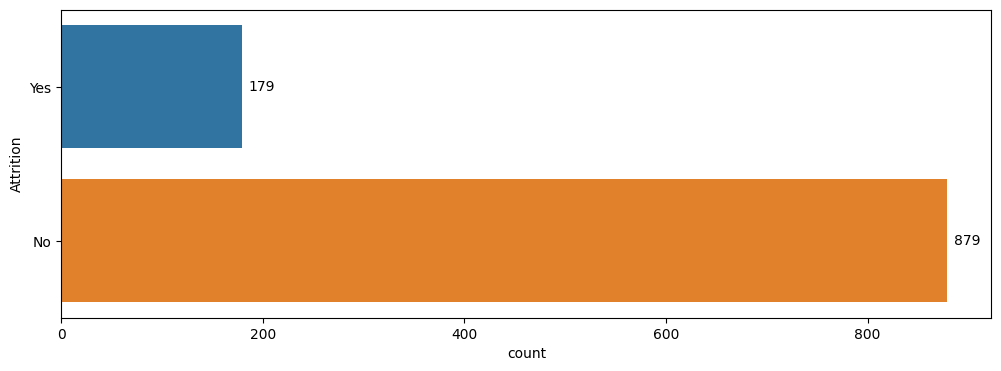

In [12]:
plt.figure(figsize=(12,4))
ax = sns.countplot(y='Attrition', hue=eda_df['Attrition'], data=eda_df)
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_width(), p.get_y() + p.get_height() / 2), xytext=(5, 0), textcoords='offset points', ha='left', va='center')
plt.show()

Data shows a high attrition rate of 16.9%, with 179 employees leaving and 879 employees staying.

### Impact of Job Satisfaction on Employee Attrition Rates

1-Low, 2-Medium, 3-High, 4-Very High

In [13]:
job_satisfaction_df = eda_df[['JobSatisfaction', 'Attrition']]
job_satisfaction_df = job_satisfaction_df.groupby(['JobSatisfaction', 'Attrition']).agg(Count=('Attrition', 'count')).reset_index()
job_satisfaction_df['Attrition'] = pd.Categorical(job_satisfaction_df['Attrition'], categories=['Yes', 'No'], ordered=True)
job_satisfaction_df

,JobSatisfaction,Attrition,Count
0,1,No,159
1,1,Yes,46
2,2,No,163
3,2,Yes,32
4,3,No,256
5,3,Yes,62
6,4,No,301
7,4,Yes,39


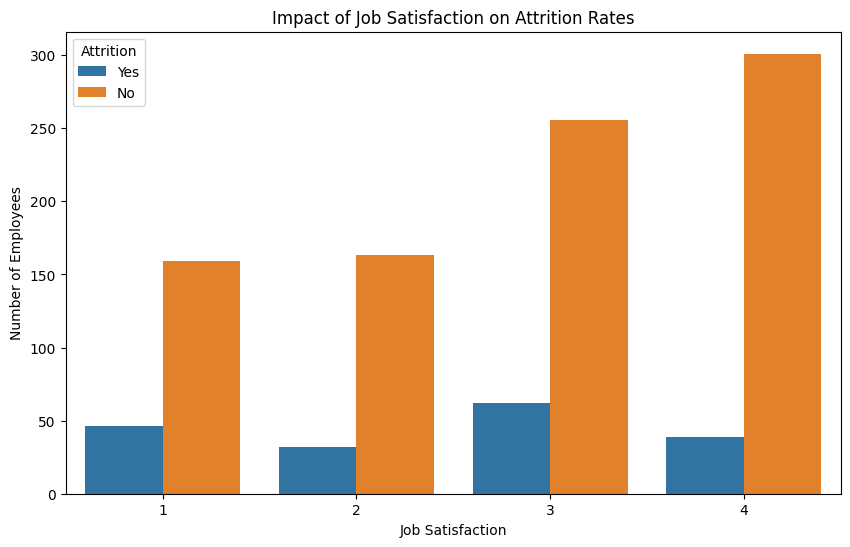

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=job_satisfaction_df, x='JobSatisfaction', y='Count', hue='Attrition')
plt.title('Impact of Job Satisfaction on Attrition Rates')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')

In [15]:
job_satisfaction_rates = job_satisfaction_df.pivot(index='JobSatisfaction', columns='Attrition', values='Count').reset_index().rename_axis(None, axis=1)
job_satisfaction_rates['AttritionRate'] = job_satisfaction_rates['Yes'] / (job_satisfaction_rates['Yes'] + job_satisfaction_rates['No']) * 100
job_satisfaction_rates

,JobSatisfaction,Yes,No,AttritionRate
0,1,46,159,22.439024
1,2,32,163,16.410256
2,3,62,256,19.496855
3,4,39,301,11.470588


In [16]:
# Export CSV
# job_satisfaction_rates.to_csv('/content/csv_output/dashboard_p1.csv', index=False)

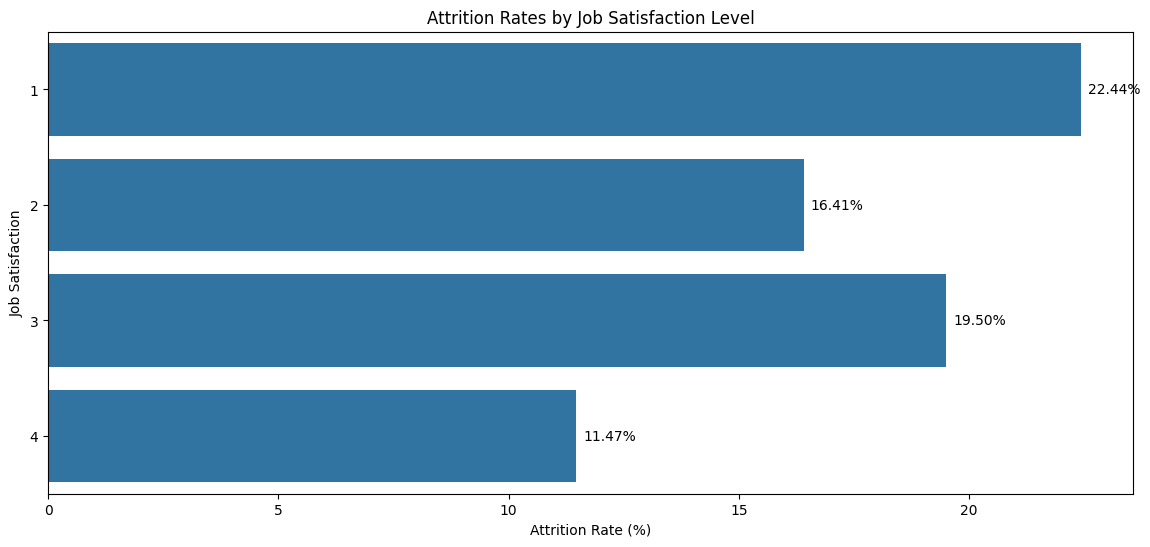

In [17]:
plt.figure(figsize=(14, 6))
sns.barplot(y='JobSatisfaction', x='AttritionRate', data=job_satisfaction_rates, orient='h')
plt.title('Attrition Rates by Job Satisfaction Level')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Job Satisfaction')


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2),
                       ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

There is a significant difference in attrition rates among employees based on their levels of job satisfaction. Here are the findings:

- Employees with '1-Low' job satisfaction level have the highest attrition rate at 22.44%.
- Employees with '2-Medium' job satisfaction level have an attrition rate of 16.41%.
- Employees with '3-High' job satisfaction level have an attrition rate of 19.50%.
- Employees with '4-Very High' job satisfaction level have the lowest attrition rate at 11.47%.

These results indicate a negative correlation between job satisfaction levels and attrition rates. Therefore, increasing job satisfaction among employees can help reduce attrition rates and retain valuable talent within the organization. It underscores the importance of prioritizing employee satisfaction in human resource management strategies to enhance employee retention.

### Work-Life Balance on Employee Attrition Rates

1-Low, 2-Good, 3-Excellent, 4-Outstanding

In [18]:
WorkLifeBalance_df = eda_df[['WorkLifeBalance', 'Attrition']]
WorkLifeBalance_df = WorkLifeBalance_df.groupby(['WorkLifeBalance', 'Attrition']).agg(Count=('Attrition', 'count')).reset_index()
WorkLifeBalance_df['Attrition'] = pd.Categorical(WorkLifeBalance_df['Attrition'], categories=['Yes', 'No'], ordered=True)
WorkLifeBalance_df

,WorkLifeBalance,Attrition,Count
0,1,No,38
1,1,Yes,18
2,2,No,206
3,2,Yes,45
4,3,No,544
5,3,Yes,94
6,4,No,91
7,4,Yes,22


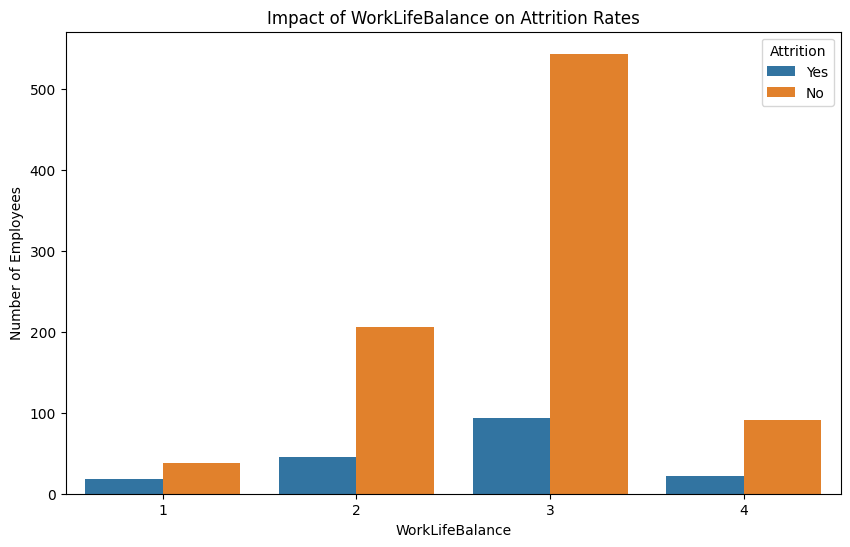

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=WorkLifeBalance_df, x='WorkLifeBalance', y='Count', hue='Attrition')
plt.title('Impact of WorkLifeBalance on Attrition Rates')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')

In [20]:
WorkLifeBalance_rates = WorkLifeBalance_df.pivot(index='WorkLifeBalance', columns='Attrition', values='Count').reset_index().rename_axis(None, axis=1)
WorkLifeBalance_rates['AttritionRate'] = WorkLifeBalance_rates['Yes'] / (WorkLifeBalance_rates['Yes'] + WorkLifeBalance_rates['No']) * 100
WorkLifeBalance_rates

,WorkLifeBalance,Yes,No,AttritionRate
0,1,18,38,32.142857
1,2,45,206,17.928287
2,3,94,544,14.733542
3,4,22,91,19.469027


In [21]:
# Export CSV
# WorkLifeBalance_rates.to_csv('/content/csv_output/dashboard_p2.csv', index=False)

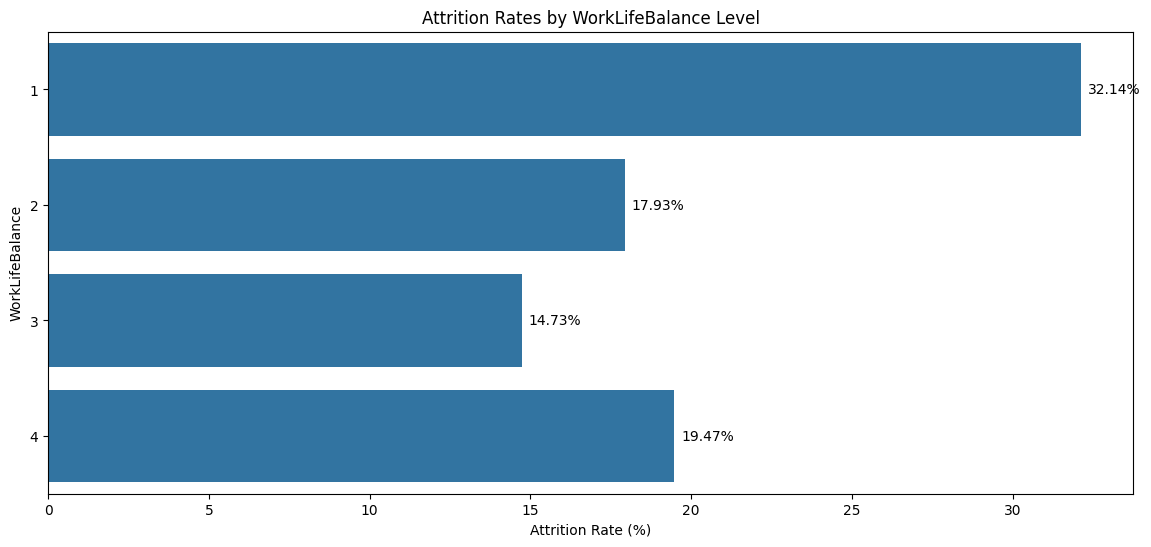

In [22]:
plt.figure(figsize=(14, 6))
sns.barplot(y='WorkLifeBalance', x='AttritionRate', data=WorkLifeBalance_rates, orient='h')
plt.title('Attrition Rates by WorkLifeBalance Level')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('WorkLifeBalance')


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2),
                       ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

There is a noticeable variation in attrition rates among employees based on their levels of WorkLifeBalance. Here are the findings:

- Employees with '1-Low' WorkLifeBalance level exhibit the highest attrition rate at 32.14%.
- Employees with '2-Good' WorkLifeBalance level demonstrate a relatively lower attrition rate at 17.93%.
- Employees with '3-Excellent' WorkLifeBalance level show a relatively low attrition rate of 14.73%.
- However, employees with '4-Outstanding' WorkLifeBalance level display a somewhat higher attrition rate at 19.47%.

These results highlight the impact of WorkLifeBalance on attrition rates, with lower WorkLifeBalance levels potentially contributing to higher attrition rates among employees. Implementing measures to improve WorkLifeBalance can aid in reducing attrition rates and fostering employee retention, emphasizing the significance of promoting work-life balance in organizational strategies for human resource management.

### YearsAtCompany vs Attrition Rate

In [23]:
YearsAtCompany_df = eda_df[['YearsAtCompany', 'Attrition']]

In [24]:
YearsAtCompany_df

,YearsAtCompany,Attrition
1,1,Yes
2,10,Yes
3,20,No
6,4,No
7,5,Yes
...,...,...
1464,10,Yes
1465,1,No
1467,1,Yes
1468,4,No


In [25]:
# Export CSV
# YearsAtCompany_df.to_csv('/content/csv_output/dashboard_p3.csv', index=False)

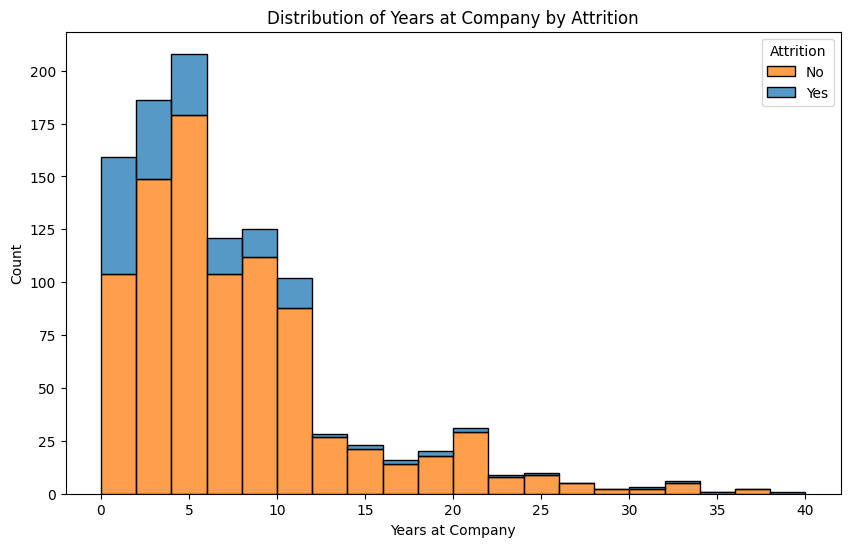

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=YearsAtCompany_df, x='YearsAtCompany', hue='Attrition', multiple='stack', bins=20)
plt.title('Distribution of Years at Company by Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

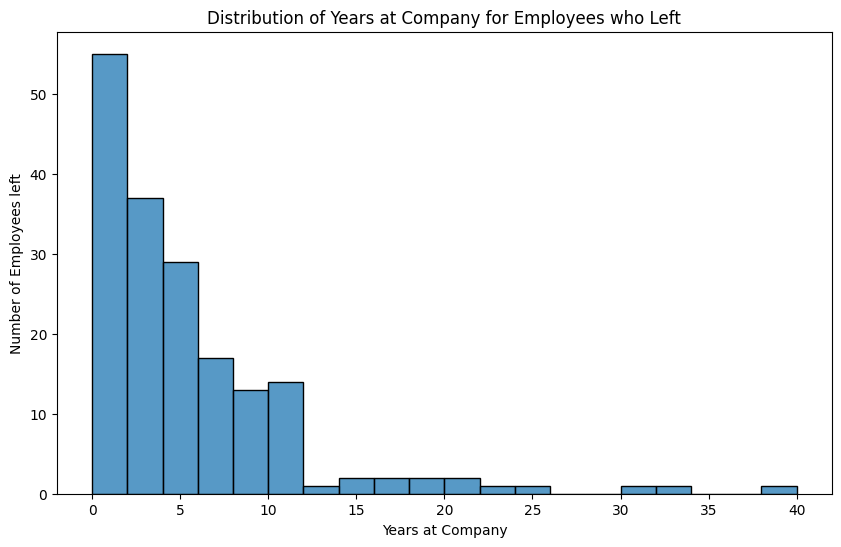

In [27]:
attrition_yes_df = YearsAtCompany_df[YearsAtCompany_df['Attrition'] == 'Yes']


plt.figure(figsize=(10, 6))
sns.histplot(data=attrition_yes_df, x='YearsAtCompany', bins=20)
plt.title('Distribution of Years at Company for Employees who Left')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees left')
plt.show()

Based on the analysis, it can be observed that the impact of YearsAtCompany on attrition reveals that the longer the tenure at the company, the fewer employees tend to leave.

### Correlation Between Overtime and Employee Attrition

In [28]:
OverTime_df = eda_df[['OverTime', 'Attrition']]

In [29]:
OverTime_df

,OverTime,Attrition
1,No,Yes
2,Yes,Yes
3,No,No
6,Yes,No
7,Yes,Yes
...,...,...
1464,No,Yes
1465,Yes,No
1467,Yes,Yes
1468,No,No


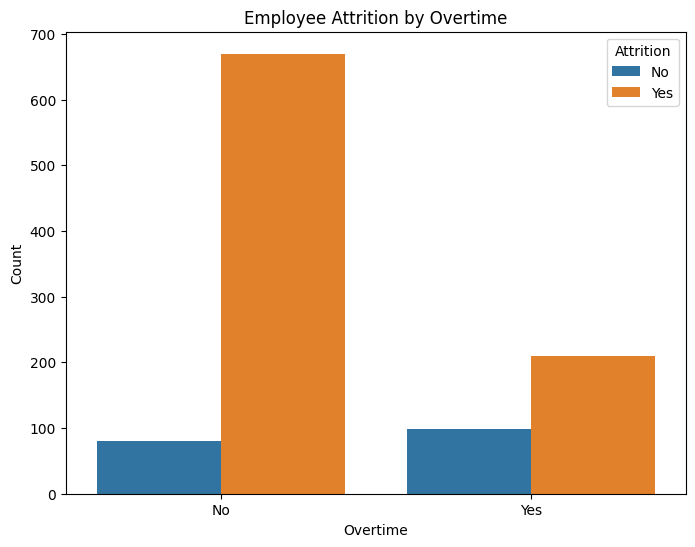

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='Attrition', data=OverTime_df)
plt.title('Employee Attrition by Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

In [31]:
OverTime_df = OverTime_df.groupby(['OverTime', 'Attrition']).agg(Count=('Attrition', 'count')).reset_index()
OverTime_df

,OverTime,Attrition,Count
0,No,No,670
1,No,Yes,81
2,Yes,No,209
3,Yes,Yes,98


In [32]:
OverTime_rates = OverTime_df.pivot(index='OverTime', columns='Attrition', values='Count').reset_index().rename_axis(None, axis=1)
OverTime_rates['AttritionRate'] = OverTime_rates['Yes'] / (OverTime_rates['Yes'] + OverTime_rates['No']) * 100
OverTime_rates

,OverTime,No,Yes,AttritionRate
0,No,670,81,10.785619
1,Yes,209,98,31.921824


In [33]:
# Export CSV
# OverTime_rates.to_csv('/content/csv_output/dashboard_p4.csv', index=False)

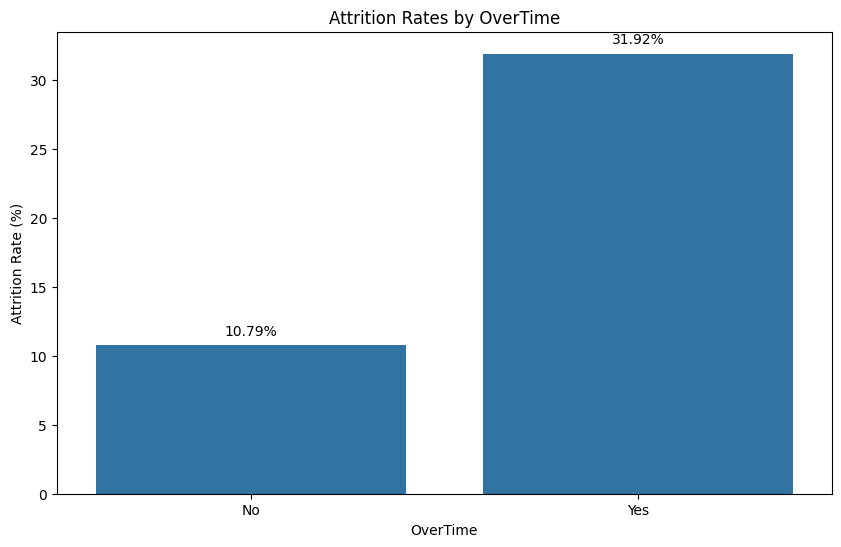

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='OverTime', y='AttritionRate', data=OverTime_rates, orient='v')
plt.title('Attrition Rates by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Attrition Rate (%)')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.show()

Based on the analysis of the correlation between Overtime and Employee Attrition, it is evident that employees working overtime have an attrition rate of 31.92%, whereas those not working overtime have an attrition rate of 10.79%.

### Age Distribution by Attrition

In [35]:
Age_df = eda_df[['Age', 'Attrition']]

In [36]:
Age_df

,Age,Attrition
1,37,Yes
2,51,Yes
3,42,No
6,40,No
7,55,Yes
...,...,...
1464,28,Yes
1465,38,No
1467,28,Yes
1468,40,No


In [37]:
# Export CSV
# Age_df.to_csv('/content/csv_output/dashboard_p5.csv', index=False)

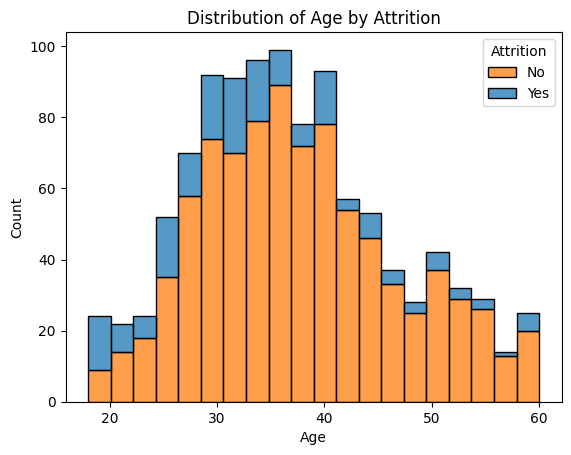

In [38]:
sns.histplot(data=Age_df, x='Age', hue='Attrition', multiple='stack', bins=20)
plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

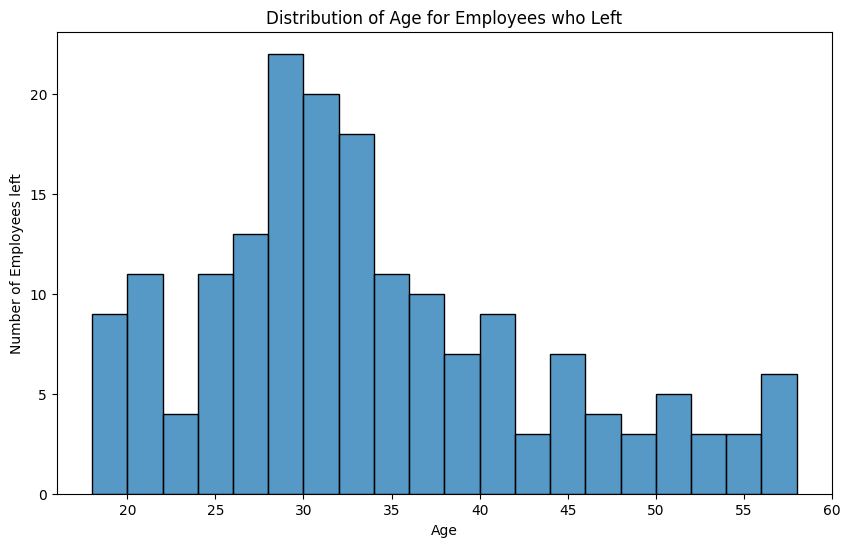

In [39]:
Age_yes_df = Age_df[Age_df['Attrition'] == 'Yes']


plt.figure(figsize=(10, 6))
sns.histplot(data=Age_yes_df, x='Age', bins=20)
plt.title('Distribution of Age for Employees who Left')
plt.xlabel('Age')
plt.ylabel('Number of Employees left')
plt.show()

From the age distribution concerning employee attrition, it's noticeable that there's a high attrition rate among employees aged between 20 to 30, gradually declining with increasing age.

In [40]:
import shutil

# Replace 'your_folder_path' with the path of the folder you want to download
folder_path = '/content/csv_output'

# Zip the folder
shutil.make_archive(folder_path, 'zip', folder_path)

# Move the zip file to /content to make it easily downloadable
shutil.move(f'{folder_path}.zip', '/content/download.zip')

'/content/download.zip'

## Modeling Machine Learning

### prepare data for machine learning

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   int64 
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   int64 
 8   EducationField            1058 non-null   object
 9   EmployeeCount             1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                  105

In [42]:
ml_data = df.copy()

In [43]:
ml_data.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4


In [44]:
# Change categorical data to numeric
ml_data['OverTime'] = ml_data['OverTime'].map({'No': 0, 'Yes': 1})
ml_data['Over18'] = ml_data['Over18'].map({'N': 0, 'Y': 1})
ml_data['Gender'] = ml_data['Gender'].map({'Male': 0, 'Female': 1})

In [45]:
from sklearn.preprocessing import LabelEncoder
colums_end = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoders = {}
for column in colums_end:
  label_encoders[column] = LabelEncoder()
  ml_data[column] = label_encoders[column].fit_transform(ml_data[column])

In [46]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EmployeeId                1058 non-null   int64
 1   Age                       1058 non-null   int64
 2   Attrition                 1058 non-null   int64
 3   BusinessTravel            1058 non-null   int64
 4   DailyRate                 1058 non-null   int64
 5   Department                1058 non-null   int64
 6   DistanceFromHome          1058 non-null   int64
 7   Education                 1058 non-null   int64
 8   EducationField            1058 non-null   int64
 9   EmployeeCount             1058 non-null   int64
 10  EnvironmentSatisfaction   1058 non-null   int64
 11  Gender                    1058 non-null   int64
 12  HourlyRate                1058 non-null   int64
 13  JobInvolvement            1058 non-null   int64
 14  JobLevel                  1058 non-null   int

### Split & Resampling data

In [47]:
X = ml_data.drop(['Attrition'], axis=1)
y = ml_data['Attrition'].values

In [48]:
# Resampling data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)
print(Counter(y_over))

Counter({0: 879, 1: 179})
Counter({1: 879, 0: 879})


In [49]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# Check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1406, 34)
(1406,)
(352, 34)
(352,)


### Model Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score


In [51]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
joblib.dump(logreg, "logreg.joblib")

['logreg.joblib']

In [53]:
prediction = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,prediction)
print("Accuracy :",accuracy_score(y_test,prediction))

Accuracy : 0.6335227272727273


## Evaluation

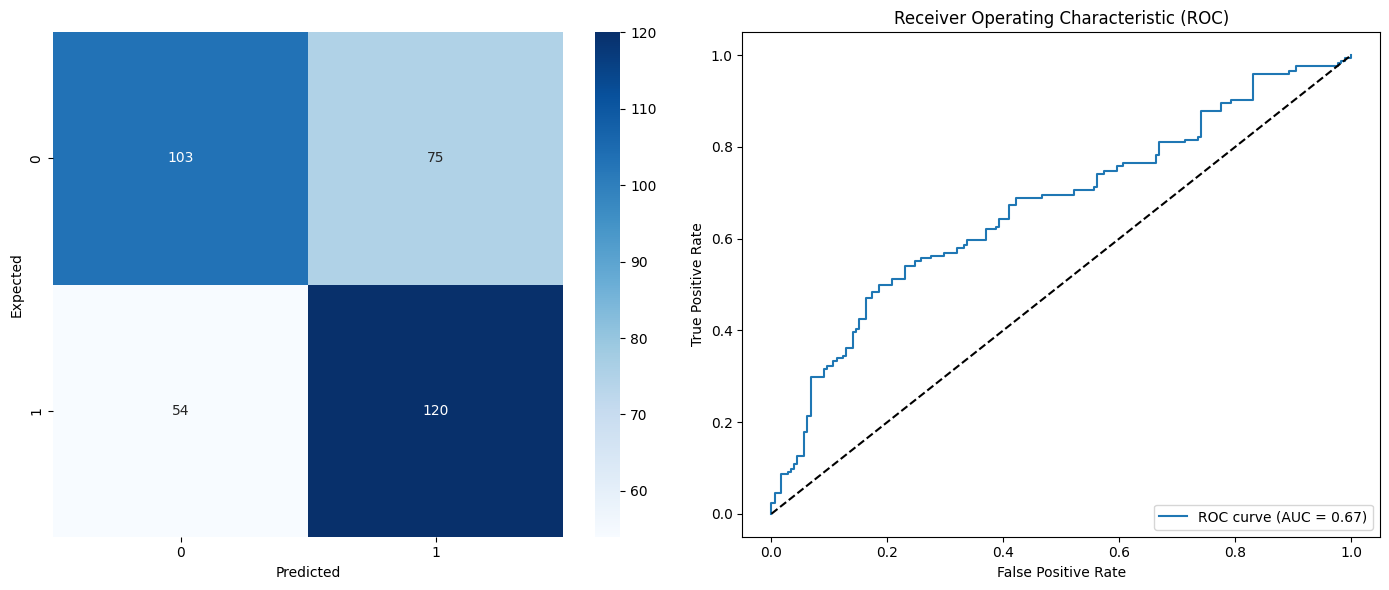

In [54]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

fig = plt.figure(figsize=(14, 6))

# Subplot 1: Confusion matrix heatmap
ax1 = fig.add_subplot(1, 2, 1)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', ax=ax1, fmt='d')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Expected')

# Subplot 2: ROC curve
ax2 = fig.add_subplot(1, 2, 2)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
ax2.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC)')
ax2.legend(loc='lower right')


plt.tight_layout()
plt.show()

In [55]:
!pip freeze
!pip list

absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.8.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.6.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.3
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.7
cuda-python==12.2.1
cudf-cu12 @ https://pypi.nvidia.c

In [56]:
!pip freeze > requirements.txt